In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing cleaned data
df_active = pd.read_csv("../Data/df_active.csv")

In [3]:
df_active

,Unnamed: 0,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,user_type,OS,ratioBuySell
0,51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,...,False,True,26,3205,106.83,8.9,us,exclusive_buyer,Browser,inf
1,85,-937288556484695351,user,Suède,en,5,8,0,0,0,...,False,True,543,3205,106.83,8.9,se,exclusive_buyer,Browser,inf
2,95,7144186809315241123,user,Canada,en,4,10,1,0,0,...,False,True,208,3205,106.83,8.9,ca,exclusive_buyer,Android,inf
3,102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,...,False,True,27,3205,106.83,8.9,gb,exclusive_buyer,Browser,inf
4,114,4907046938384800140,user,Etats-Unis,en,28,29,0,0,0,...,True,False,15,3205,106.83,8.9,us,exclusive_buyer,iOS,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22283,98883,4686499517041021923,user,Etats-Unis,en,7,9,0,0,0,...,False,True,708,3204,106.80,8.9,us,prospective_user,Browser,NaN
22284,98889,4508710134224075356,user,France,fr,3,8,1,0,0,...,False,True,477,3204,106.80,8.9,fr,prospective_user,Browser,NaN
22285,98896,4715935376764926056,user,Allemagne,en,3,8,10,0,0,...,True,True,15,3204,106.80,8.9,de,prospective_user,iOS,NaN
22286,98901,7257878909040060228,user,Espagne,es,3,8,31,0,0,...,False,True,13,3204,106.80,8.9,es,prospective_user,Browser,NaN


In [4]:
# Creating DF only with buyers (users having bought at least one product), excluding both apps, due to irrelevancy in analysis.
df_buyers = df_active.loc[((df_active["productsBought"]>=1))&(df_active["OS"]!="Both Apps")]
df_buyers

,Unnamed: 0,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,user_type,OS,ratioBuySell
0,51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,...,False,True,26,3205,106.83,8.9,us,exclusive_buyer,Browser,inf
1,85,-937288556484695351,user,Suède,en,5,8,0,0,0,...,False,True,543,3205,106.83,8.9,se,exclusive_buyer,Browser,inf
2,95,7144186809315241123,user,Canada,en,4,10,1,0,0,...,False,True,208,3205,106.83,8.9,ca,exclusive_buyer,Android,inf
3,102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,...,False,True,27,3205,106.83,8.9,gb,exclusive_buyer,Browser,inf
4,114,4907046938384800140,user,Etats-Unis,en,28,29,0,0,0,...,True,False,15,3205,106.83,8.9,us,exclusive_buyer,iOS,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,98260,-5414959342816599813,user,Pays-Bas,en,8,9,29,25,20,...,False,False,14,3204,106.80,8.9,nl,buyer_and_seller,Browser,0.05
6889,98352,-1780456174896106635,user,Espagne,en,11,8,9,0,2,...,False,True,26,3204,106.80,8.9,es,buyer_and_seller,Browser,0.50
6890,98368,1844013789737284769,user,Portugal,en,31,10,521,3,2,...,False,False,11,3204,106.80,8.9,pt,buyer_and_seller,Browser,8.50
6891,98442,3179447064315962304,user,Grèce,en,31,7,14,3,1,...,True,False,17,3204,106.80,8.9,gr,buyer_and_seller,iOS,1.00


In [5]:
# Creating DF only with sellers (users having bought at least one product), excluding "both apps", due to irrelevancy in analysis.
df_sellers = df_active.loc[((df_active["productsSold"]>=1))&(df_active["OS"]!="Both Apps")]
df_sellers

,Unnamed: 0,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,user_type,OS,ratioBuySell
4857,133,-4975676516338518373,user,France,fr,7,8,6,1,1,...,True,True,485,3205,106.83,8.9,fr,exclusive_seller,iOS,0.00
4858,164,-5922910413286749505,user,Royaume-Uni,en,10,8,0,0,3,...,True,True,665,3205,106.83,8.9,gb,exclusive_seller,iOS,0.00
4859,242,2070806682096194894,user,France,fr,3,8,0,0,1,...,False,True,405,3205,106.83,8.9,fr,exclusive_seller,Browser,0.00
4860,614,1675020017057075308,user,Finlande,en,8,8,0,4,3,...,True,True,82,3205,106.83,8.9,fi,exclusive_seller,iOS,0.00
4861,1084,-5427472487749231410,user,Allemagne,en,5,8,1,0,2,...,True,True,192,3204,106.80,8.9,de,exclusive_seller,iOS,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,98260,-5414959342816599813,user,Pays-Bas,en,8,9,29,25,20,...,False,False,14,3204,106.80,8.9,nl,buyer_and_seller,Browser,0.05
6889,98352,-1780456174896106635,user,Espagne,en,11,8,9,0,2,...,False,True,26,3204,106.80,8.9,es,buyer_and_seller,Browser,0.50
6890,98368,1844013789737284769,user,Portugal,en,31,10,521,3,2,...,False,False,11,3204,106.80,8.9,pt,buyer_and_seller,Browser,8.50
6891,98442,3179447064315962304,user,Grèce,en,31,7,14,3,1,...,True,False,17,3204,106.80,8.9,gr,buyer_and_seller,iOS,1.00


In [6]:
# Creating Group by User Type and OS, Count of Users, excluding "both apps", due to irrelevancy in analysis.
df_user_types_os = (df_active.groupby(["user_type","OS"]).agg({"identifierHash":"count"}).drop(index="Both Apps", level=1).sort_values(["OS","identifierHash"], ascending=False).reset_index())
df_user_types_os

,user_type,OS,identifierHash
0,prospective_user,iOS,6039
1,exclusive_buyer,iOS,1527
2,exclusive_seller,iOS,763
3,buyer_and_seller,iOS,309
4,prospective_user,Browser,8326
5,exclusive_buyer,Browser,2973
6,exclusive_seller,Browser,556
7,buyer_and_seller,Browser,192
8,prospective_user,Android,966
9,exclusive_buyer,Android,315


In [34]:
# Creating Group by User Type, Count of Users, excluding "prospective users", due to irrelevancy in analysis.
df_user_types = (df_active.groupby("user_type").agg({"identifierHash":"count"}).drop(index="prospective_user").sort_values(["identifierHash"], ascending=False).reset_index())
df_user_types

,user_type,identifierHash
0,exclusive_buyer,4857
1,exclusive_seller,1474
2,buyer_and_seller,562


In [8]:
# Creating DF of Users by OS
df_os = (df_active.groupby("OS").agg({"identifierHash":"count"}).sort_values(["identifierHash"], ascending=False).drop(index="Both Apps").reset_index())
df_os

,OS,identifierHash
0,Browser,12047
1,iOS,8638
2,Android,1469


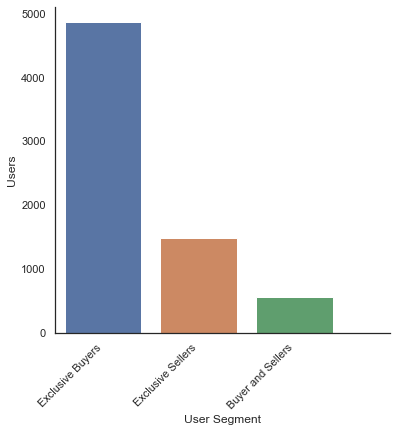

In [39]:
# Plotting Histogram of User Segments and User Amounts
fig, ax = plt.subplots(figsize=(6,6))
sns.set(style="white");
sns.barplot(data=df_user_types,x="user_type",y="identifierHash", ax=ax);

ax.set(xlabel='User Segment', ylabel='Users');
plt.xticks(np.arange(4), ('Exclusive Buyers', 'Exclusive Sellers','Buyer and Sellers'), rotation=45, 
    horizontalalignment='right',
    fontweight='light');
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False);

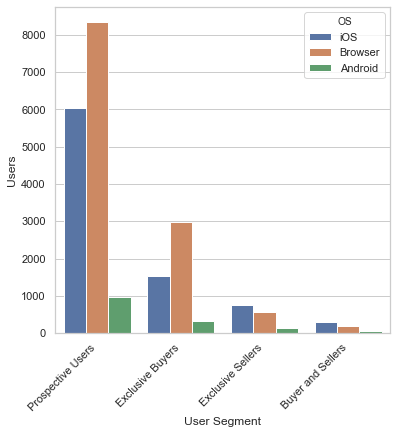

In [10]:
#Plotting Histogram of User Segments/Amounts per OS
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=df_user_types_os,x="user_type",y="identifierHash",hue="OS", ax=ax);
sns.set(style="whitegrid");
ax.set(xlabel='User Segment', ylabel='Users');
plt.xticks(np.arange(4), ('Prospective Users', 'Exclusive Buyers', 'Exclusive Sellers','Buyer and Sellers'), rotation=45, 
    horizontalalignment='right',
    fontweight='light');

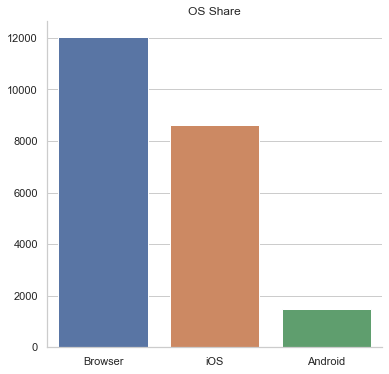

In [11]:
# Histogram for Operating System Distribution
fig, ax = plt.subplots(figsize=(6,6))
palette={"Android":"g","Browser":"y","iOS":"b"}
sns.set(style="white")

sns.barplot(data=df_os,x="OS",y="identifierHash", ax=ax);
sns.set(style="white");
ax.set(xlabel='Operating System', ylabel='Users');
ax.set(xlabel='', ylabel='');
ax.set_title("OS Share")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [12]:
# Creating DF for OS and descriptives for each relevant user group
df_avg_buy_type = (df_active.groupby(["OS","user_type"]).agg({"productsBought":["count","sum","median","mean"],"productsSold":["count","sum","median","mean"]}).drop(index="Both Apps").drop(index="prospective_user",level=1).sort_values(["user_type"], ascending=False).reset_index())
df_avg_buy_type

OS         user_type productsBought                          \
                                      count   sum median       mean   
0  Android  exclusive_seller            137     0    0.0   0.000000   
1  Browser  exclusive_seller            556     0    0.0   0.000000   
2      iOS  exclusive_seller            763     0    0.0   0.000000   
3  Android   exclusive_buyer            315   800    1.0   2.539683   
4  Browser   exclusive_buyer           2973  6109    1.0   2.054827   
5      iOS   exclusive_buyer           1527  4918    1.0   3.220694   
6  Android  buyer_and_seller             51   581    4.0  11.392157   
7  Browser  buyer_and_seller            192  1848    2.0   9.625000   
8      iOS  buyer_and_seller            309  2353    2.0   7.614887   

  productsSold                         
         count   sum median      mean  
0          137   751      2  5.481752  
1          556  2442      1  4.392086  
2          763  4845      2  6.349934  
3          315     0      0  0.000000  
4         2973     0      0  0.000000  
5         1527     0      0  0.000000  
6           51   316      2  6.196078  
7          192   791      1  4.119792  
8          309  2650      2  8.576052

In [13]:
# Checking aggregated descriptives
(df_active.groupby(["OS"]).agg({"productsBought":["count","sum","median","mean"],"productsSold":["count","sum","median","mean"]}).drop(index="Both Apps").reset_index())

OS productsBought                        productsSold               \
                    count   sum median      mean        count   sum median   
0  Android           1469  1381      0  0.940095         1469  1067      0   
1  Browser          12047  7957      0  0.660496        12047  3233      0   
2      iOS           8638  7271      0  0.841746         8638  7495      0   

             
       mean  
0  0.726344  
1  0.268366  
2  0.867678

In [14]:
# Making the DF for Buyers-Means Seaborn ready - no multilevel DF
df_avg_buy_type_sns = (df_active.groupby(["OS","user_type"]).agg({"productsBought":"mean"}).drop(index="Both Apps").drop(index=["prospective_user","exclusive_seller"],level=1).sort_values(["user_type"], ascending=False).reset_index())
df_avg_buy_type_sns

,OS,user_type,productsBought
0,Android,exclusive_buyer,2.539683
1,Browser,exclusive_buyer,2.054827
2,iOS,exclusive_buyer,3.220694
3,Android,buyer_and_seller,11.392157
4,Browser,buyer_and_seller,9.625000
5,iOS,buyer_and_seller,7.614887


In [15]:
# Making the DF for Seller-Means Seaborn ready - no multilevel DF
df_avg_sell_type_sns = (df_active.groupby(["OS","user_type"]).agg({"productsSold":"mean"}).drop(index="Both Apps").drop(index=["prospective_user","exclusive_buyer"],level=1).sort_values(["user_type"], ascending=False).reset_index())
df_avg_sell_type_sns 

,OS,user_type,productsSold
0,Android,exclusive_seller,5.481752
1,Browser,exclusive_seller,4.392086
2,iOS,exclusive_seller,6.349934
3,Android,buyer_and_seller,6.196078
4,Browser,buyer_and_seller,4.119792
5,iOS,buyer_and_seller,8.576052


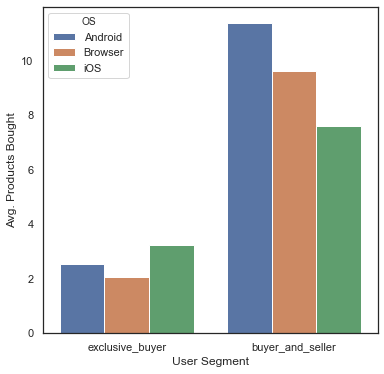

In [16]:
# Plotting Buyer OS Means
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=df_avg_buy_type_sns,x="user_type",y="productsBought",hue="OS", ax=ax);
sns.set(style="whitegrid");
ax.set(xlabel='User Segment', ylabel='Avg. Products Bought');


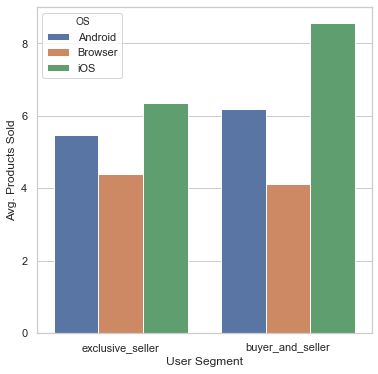

In [17]:
# Plotting Seller OS Means
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=df_avg_sell_type_sns,x="user_type",y="productsSold",hue="OS", ax=ax);
sns.set(style="whitegrid");
ax.set(xlabel='User Segment', ylabel='Avg. Products Sold');


In [18]:
# Making the avg. aggregated DF only for buyers
df_avg_buyers = (df_buyers.groupby(["OS"]).agg({"productsBought":"mean"}).sort_values(["productsBought"], ascending=False).reset_index())
df_avg_buyers

,OS,productsBought
0,iOS,3.960240
1,Android,3.773224
2,Browser,2.514060


In [19]:
# Making the avg. aggregated DF only for Sellers
df_avg_sellers = (df_sellers.groupby(["OS"]).agg({"productsSold":"mean"}).sort_values(["productsSold"], ascending=False).reset_index())
df_avg_sellers

,OS,productsSold
0,iOS,6.991604
1,Android,5.675532
2,Browser,4.322193


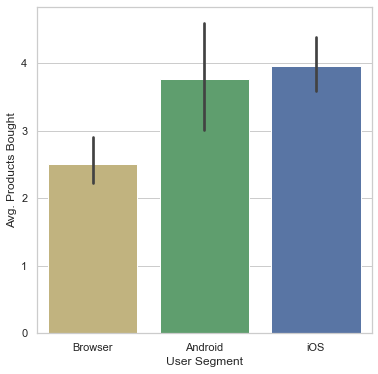

In [20]:
# Plotting Only-Buyers OS Means with CI
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
palette={"Android":"g","Browser":"y","iOS":"b"}
sns.set(style="white")

sns.barplot(data=df_buyers,x="OS",y="productsBought", ax=ax, palette=palette);
ax.set(xlabel='User Segment', ylabel='Avg. Products Bought');

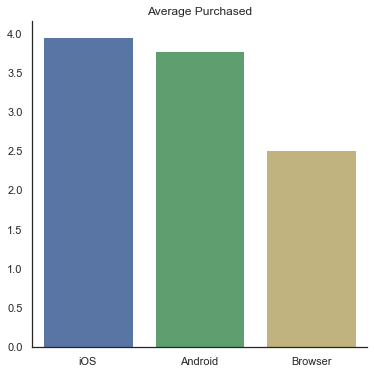

In [21]:
# Plotting Only-Buyers OS Means
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
palette={"Android":"g","Browser":"y","iOS":"b"}
sns.set(style="white")

sns.barplot(data=df_avg_buyers,x="OS",y="productsBought", ax=ax, palette=palette);
ax.set(xlabel='', ylabel='');
ax.set_title("Average Purchased")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

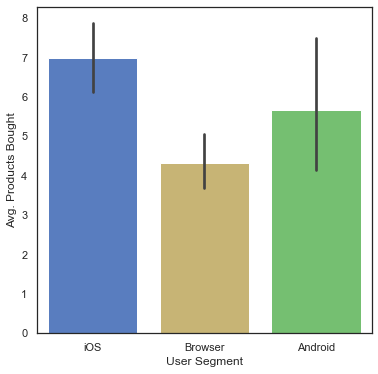

In [22]:
# Plotting Only-Sellers OS Means with CI
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
palette={"Android":"g","Browser":"y","iOS":"b"}
sns.barplot(data=df_sellers,x="OS",y="productsSold", ax=ax,palette=palette);
sns.set(style="whitegrid");
ax.set(xlabel='User Segment', ylabel='Avg. Products Bought');

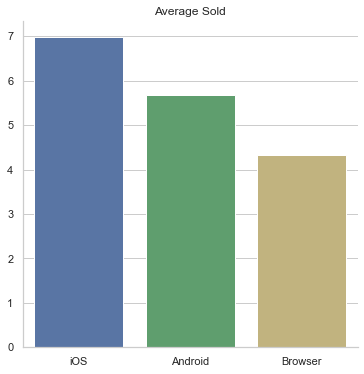

In [23]:
# Plotting Only-Buyers OS Means without CI
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
palette={"Android":"g","Browser":"y","iOS":"b"}
sns.set(style="white")

sns.barplot(data=df_avg_sellers,x="OS",y="productsSold", ax=ax, palette=palette);
ax.set(xlabel='', ylabel='');
ax.set_title("Average Sold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

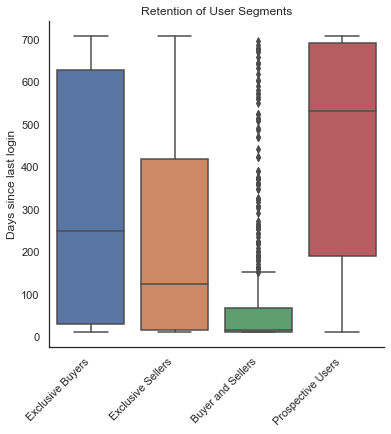

In [42]:
# Creating Box Plot of User Groups and Retention
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
sns.set(style="white")

sns.boxplot(x="user_type", y="daysSinceLastLogin", data=df_active, ax=ax)
ax.set(xlabel='', ylabel='Days since last login');
ax.set_title("Retention of User Segments")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(np.arange(4), ('Exclusive Buyers', 'Exclusive Sellers','Buyer and Sellers','Prospective Users'), rotation=45, 
    horizontalalignment='right',
    fontweight='light');

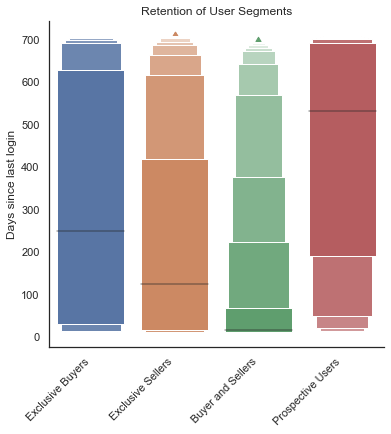

In [25]:
# Creating Boxen Plot of User Groups and Retention
fig, ax = plt.subplots(figsize=(6,6))
sns.set_color_codes("muted")
sns.set(style="white")
diamonds = sns.load_dataset("diamonds")
sns.boxenplot(x="user_type", y="daysSinceLastLogin", data=df_active,scale="linear", ax=ax)
ax.set(xlabel='', ylabel='Days since last login');
ax.set_title("Retention of User Segments")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(np.arange(4), ('Exclusive Buyers', 'Exclusive Sellers','Buyer and Sellers','Prospective Users'), rotation=45, 
    horizontalalignment='right',
    fontweight='light');

# Calculating means of user groups and thresholds of activity for analysis

In [26]:
df_sellers.loc[(df_active["productsSold"]<3)&(df_active["productsBought"]==0), "productsListed"].mean()

0.759075907590759

In [27]:
df_active.loc[df_active["user_type"]=="prospective_user", "productsListed"].mean()

0.05761610912633972

In [28]:
df_active.loc[(df_active["user_type"]=="prospective_user")&(df_active["productsWished"]<5), "productsListed"].mean()

0.05984091074947092

In [29]:
df_active.loc[df_active["user_type"]=="exclusive_buyer", "productsListed"].mean()

0.05188387893761581

In [30]:
df_sellers.loc[(df_active["productsSold"]<2)&(df_active["productsBought"]<3), "productsListed"].describe()

count    812.000000
mean       0.597291
std        1.454325
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       18.000000
Name: productsListed, dtype: float64

In [31]:
df_sellers.loc[(df_active["productsSold"]<2)&(df_active["productsBought"]<3)&(df_active["productsListed"]>0), "daysSinceLastLogin"].describe()

count    230.000000
mean     182.969565
std      207.727807
min       11.000000
25%       18.000000
50%       89.000000
75%      318.750000
max      696.000000
Name: daysSinceLastLogin, dtype: float64

In [32]:
df_active.loc[(df_active["user_type"]=="exclusive_buyer")&(df_active["productsBought"]<3), "productsListed"].describe()

count    3863.000000
mean        0.034688
std         0.315060
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: productsListed, dtype: float64